<div style="text-align:left;">
  <a href="https://code213.tech/" target="_blank">
    <img src="../images/code213.PNG" alt="QWorld">
  </a>
  <p><em>prepared by Latreche Sara</em></p>
</div>


**<center><font size=8>Classification Problem the MNIST Dataset</font></center>**

<div style="text-align: center;">
    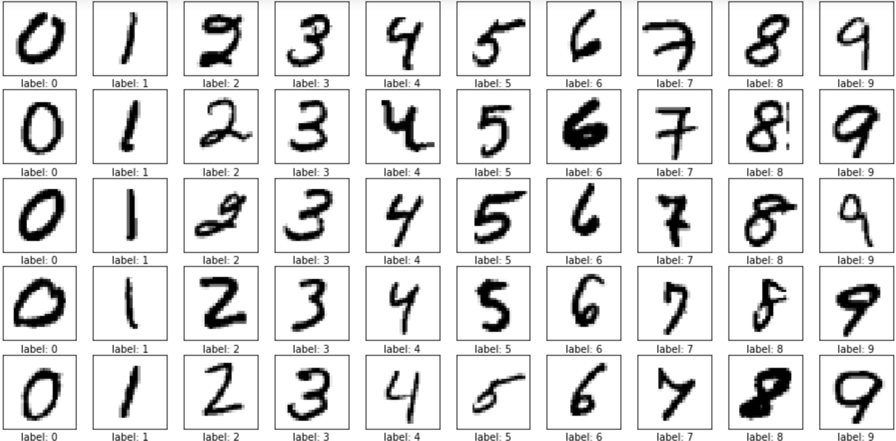
</div>



**author**: Latreche Sara  
**date**: /2025  

**Table of Contents**

- <a href='#intro'>1 | Project Overview and Objectives</a>

- <a href='#env'>1.1 | Setting Up the Environment</a>

- <a href='#explore'>1.2 | MNIST Data Exploration</a>

- <a href='#binary'>2.1 | Training a Binary Classifier</a>

- <a href='#perf'>3 | Performance Measures</a>

- <a href='#cvacc'>3.1 | Measuring Accuracy Using Cross-Validation</a>

- <a href='#cmatrix'>3.2 | Confusion Matrix</a>

- <a href='#precrec'>3.3 | Precision and Recall</a>

- <a href='#tradeoff'>3.4 | Precision/Recall Trade-off</a>

- <a href='#roc'>3.5 | The ROC Curve</a>

- <a href='#multiclass'>4.1 | Multiclass Classification</a>

- <a href='#multilabel'>4.2| Multilabel Classification</a>

- <a href='#multioutput'>4.3 | Multioutput Classification</a>


## <b> <span style='color:#e61227'>|</span> <a id='intro'>Project Overview and Objectives</a></b>

**In this case study, we’ll build a Machine Learning model to classify handwritten digits from the MNIST dataset.  
We’ll walk through the full ML pipeline—from data exploration and preprocessing to training, evaluating, and fine-tuning classification models.  
Imagine you've just joined a research team working on OCR (Optical Character Recognition). Your lead gives you this task:**

**"We need a model that can accurately recognize handwritten digits in scanned documents. It should be robust, fast, and ready for integration into digitization tools used by schools, banks, and government agencies."**

**This isn't just a technical demo—it has real-world applications in:**

- **Digitizing Paper Forms**: Automating the reading of handwritten fields in administrative documents.
- **Educational Technology**: Correcting or understanding students’ handwritten answers.
- **Banking**: Processing checks and forms automatically.

 **Your Mission**

- Use Machine Learning to build a digit classifier that:
  - Understands patterns in handwritten digits.
  - Achieves high accuracy on unseen digit images.
  - Is generalizable and reliable for practical OCR systems.

**This notebook walks through the end-to-end ML workflow using the MNIST dataset to solve this classification challenge.**

---

<a id="env"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>1.1 |</span> Setting Up the Environment</b></p>
</div>


First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
#IS_COLAB = "google.colab" in sys.modules
#IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
#assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<a id="explore"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>1.2 |</span> MNIST Data Exploration</b></p>
</div>


**Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this and  we use `as_frame=False`.

In [ ]:
# Task 1: Load the MNIST Dataset from sklearn.datasets
#
# Instructions:
# - Import `fetch_openml` from `sklearn.datasets`
# - Create a variable named `mnist`
# - Load the dataset using the following arguments:
#     - name: 'mnist_784'
#     - version: 1
#     - as_frame: False
# - Call `mnist.keys()` to inspect the structure of the returned object

# Your code here


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
# Task 2: Separate Features and Labels from the MNIST Dataset
#
# Instructions:
# - Extract the feature matrix and assign it to a variable named `X`
# - Extract the target vector and assign it to a variable named `y`
# - Use the keys `"data"` and `"target"` from the `mnist` dictionary-like object
# - Display the shape of `X` using `.shape`

# Your code here

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
28 * 28

784

In [ ]:
# Task 3: Visualize the First Digit in the Dataset
#
# Instructions:
# - Use `%matplotlib inline` to enable inline plotting
# - Import `matplotlib` as `mpl` and `pyplot` as `plt`
# - Select the first image in `X` and store it in a variable named `some_digit`
# - Reshape `some_digit` into a 28x28 image and store it in `some_digit_image`
# - Use `plt.imshow()` to display the digit image with `cmap=mpl.cm.binary`
# - Remove the axis using `plt.axis("off")`
# - Save the figure using `save_fig("some_digit_plot")` (assume `save_fig` is predefined)
# - Show the plot using `plt.show()`

# Your code here

Saving figure some_digit_plot


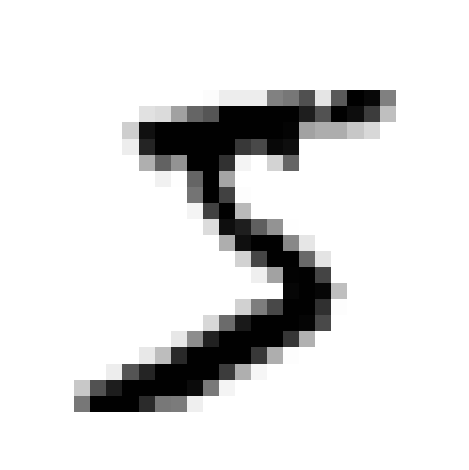

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [7]:
y[0]

'5'

In [48]:
y = y.astype(np.uint8)

In [ ]:
# Task 4: Define a Function to Plot a Digit
#
# Instructions:
# - Define a function named `plot_digit` that takes one argument: `data`
# - Inside the function:
#     - Reshape `data` into a 28x28 array and assign it to `image`
#     - Use `plt.imshow()` to display the image with:
#         - `cmap=mpl.cm.binary`
#         - `interpolation="nearest"`
#     - Turn off the axis with `plt.axis("off")`

# Your code here

In [9]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
# EXTRA Task: Define a Function to Plot Multiple Digits in a Grid
#
# Instructions:
# - Define a function `plot_digits(instances, images_per_row=10, **options)`
# - Inside the function:
#     - Set image size to 28
#     - Compute `n_rows` to determine how many rows are needed
#     - Pad the instances with blank images (if needed) using `np.zeros`
#     - Reshape the array into a 4D grid with shape `(n_rows, images_per_row, 28, 28)`
#     - Use `transpose()` to reorder axes and combine the digit images into one large image
#     - Use `plt.imshow()` to display the grid with `cmap=mpl.cm.binary`
#     - Turn off axis with `plt.axis("off")`

# Your code here

In [10]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
# Task 5: Display a Grid of the First 100 Digits
#
# Instructions:
# - Create a new figure with size (9, 9) using `plt.figure()`
# - Select the first 100 images from `X` and assign to `example_images`
# - Use the previously defined `plot_digits()` function to display the images in a grid
#     - Set `images_per_row=10`
# - Save the figure using `save_fig("more_digits_plot")`
# - Show the plot using `plt.show()`

# Your code here

Saving figure more_digits_plot


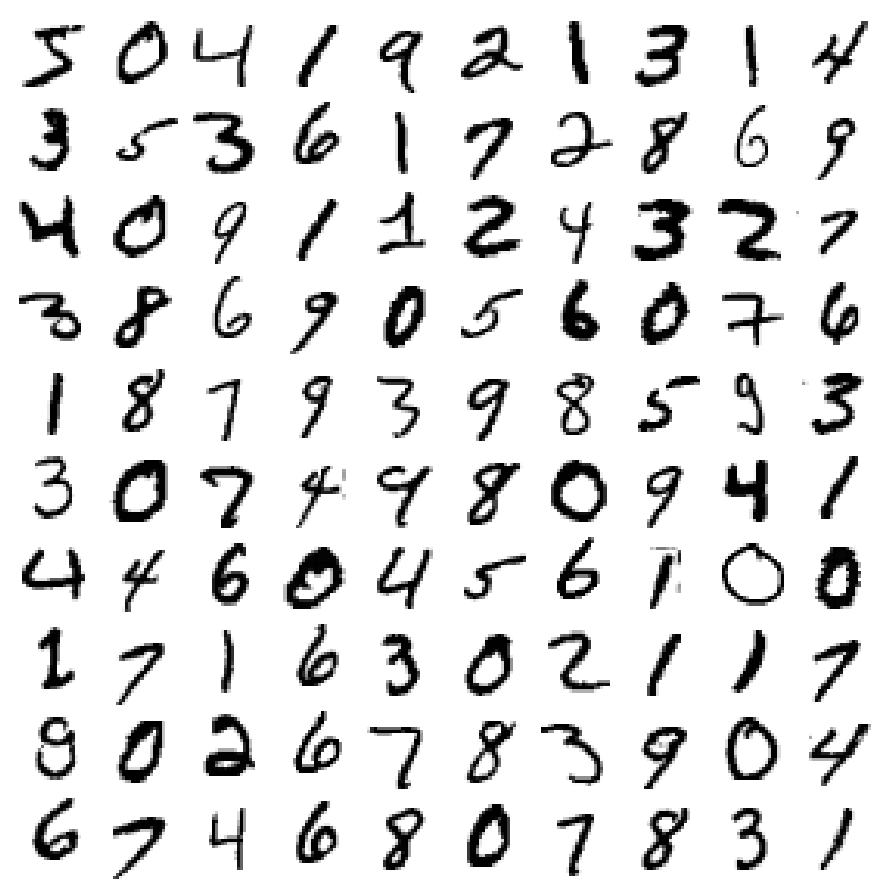

In [11]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [12]:
y[0]

np.uint8(5)

In [ ]:
# Task 6: Split the MNIST Dataset into Training and Test Sets
#
# Instructions:
# - Split `X` and `y` into training and test sets
# - Assign the first 60,000 images and labels to `X_train` and `y_train`
# - Assign the remaining 10,000 images and labels to `X_test` and `y_test`

# Your code here

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

<a id="binary"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>2.1 |</span> Training a Binary Classifier</b></p>
</div>


In [ ]:
# Task 7: Create Binary Target Vectors for Digit 5 Detection
#
# Instructions:
# - Create a boolean array `y_train_5` that is True for labels equal to '5' in `y_train`
# - Create a boolean array `y_test_5` that is True for labels equal to '5' in `y_test`
# - These arrays will be used for binary classification (5 vs. not 5)

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

**Note**: some hyperparameters will have a different defaut value in future versions of Scikit-Learn, such as `max_iter` and `tol`. To be future-proof, we explicitly set these hyperparameters to their future default values.

In [ ]:
# Task 8: Train a Stochastic Gradient Descent (SGD) Classifier
#
# Instructions:
# - Import `SGDClassifier` from `sklearn.linear_model`
# - Create an instance of `SGDClassifier` with the following parameters:
#     - `max_iter=1000`
#     - `tol=1e-3`
#     - `random_state=42`
# - Use the `fit()` method to train the classifier on `X_train` and `y_train_5`

# Your code here

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
# Task 9: Make Predictions with the Trained SGD Classifier
#
# Instructions:
# - Use the trained `sgd_clf` model to make a prediction on `some_digit`
# - Use the `predict()` method and pass `[some_digit]` to predict the class of the first digit in the dataset

# Your code here

In [16]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
# Task 10: Perform Cross-Validation to Evaluate the Model
#
# Instructions:
# - Import `cross_val_score` from `sklearn.model_selection`
# - Use `cross_val_score` to evaluate the trained `sgd_clf` on `X_train` and `y_train_5`
# - Set `cv=3` to use 3-fold cross-validation
# - Set `scoring="accuracy"` to evaluate the accuracy of the classifier

# Your code here

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

<a id="perf"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>3|</span> Performance Measures</b></p>
</div>


<a id="cvacc"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>3.1 |</span> Measuring Accuracy Using Cross-Validation</b></p>
</div>


In [ ]:
# Task 11: Manually Perform Stratified K-Fold Cross-Validation
#
# Instructions:
# - Import `StratifiedKFold` from `sklearn.model_selection` and `clone` from `sklearn.base`
# - Initialize `StratifiedKFold` with `n_splits=3`, `shuffle=True`, and `random_state=42`
# - Loop through the train-test splits using `skfolds.split()`:
#     - Clone the `sgd_clf` model inside the loop to ensure each fold has a fresh model
#     - Use the `train_index` and `test_index` to select the training and testing data
#     - Fit the cloned model on the training fold, make predictions on the test fold
#     - Calculate and print the accuracy of the predictions by comparing `y_pred` with `y_test_fold`

# Your code here

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [ ]:
# Task 12: Create a Custom Classifier that Never Predicts 5
#
# Instructions:
# - Import `BaseEstimator` from `sklearn.base`
# - Define a class `Never5Classifier` that inherits from `BaseEstimator`
# - Implement the `fit` method (it doesn't need to do anything, so pass)
# - Implement the `predict` method to return an array of `False` (not 5) for all predictions
# - The `predict` method should return an array of `False` values, indicating that the classifier never predicts 5

# Your code here

In [ ]:
# Define a custom classifier class `Never5Classifier` that inherits from `BaseEstimator`.
# This classifier will:
# - Ignore the training labels during fitting (fit method does nothing).
# - Always predict the same label (e.g., not digit 5), returning an array of `False`.

# Variable to define:
# - `Never5Classifier`: Class name (inherits from BaseEstimator).
# - `fit`: Method to accept training data and labels.
# - `predict`: Method to return predictions (all False).



In [19]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
# Define and evaluate the Never5Classifier using cross-validation.

# Variables to define:
# - `never_5_clf`: instance of Never5Classifier
# - `X_train`: training features
# - `y_train_5`: binary target (True if digit is 5, else False)
# - `cv`: number of cross-validation folds
# - `scoring`: evaluation metric (use "accuracy")

# Method:
# - Use `cross_val_score` to compute accuracy over 3 folds


<a id="cmatrix"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>3.2 |</span> Confusion Matrix</b></p>
</div>


In [ ]:
# Generate cross-validated predictions for training data.

# Variables to define:
# - `sgd_clf`: trained classifier (e.g., SGDClassifier)
# - `X_train`: input training data
# - `y_train_5`: target labels (True if 5, else False)
# - `cv`: number of folds (e.g., 3)

# Method:
# - Use `cross_val_predict` to get predictions for each fold
# - Store the predictions in `y_train_pred`


In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
# Compute the confusion matrix to evaluate classification performance.

# Variables to define:
# - `y_train_5`: true binary labels (e.g., whether the digit is 5)
# - `y_train_pred`: predicted binary labels (from cross_val_predict)

# Method:
# - Use `confusion_matrix(y_true, y_pred)` to generate the matrix


In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
# Create a perfect prediction scenario for evaluation.

# Variables:
# - `y_train_5`: the true labels for training (e.g., whether each image is a 5)

# Explanation:
# - Assign `y_train_perfect_predictions` directly as `y_train_5` to simulate perfect predictions
# - Use `confusion_matrix(y_true, y_pred)` to verify the result


In [22]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

<a id="precrec"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>3.3 |</span> Precision and Recall</b></p>
</div>


In [ ]:
# Evaluate precision and recall of the classifier's predictions

# Variables:
# - `y_train_5`: true labels (whether each training image is a 5)
# - `y_train_pred`: predicted labels (output from cross_val_predict)

# Explanation:
# - Use `precision_score` to measure how many predicted positives are truly positive
# - Use `recall_score` to measure how many actual positives were correctly predicted


In [23]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
# Compute precision manually from confusion matrix

# Variables:
# - `cm`: confusion matrix where
#    cm[1, 1] is true positives (correctly predicted 5s)
#    cm[0, 1] is false positives (non-5s incorrectly predicted as 5)

# Formula:
# precision = true positives / (true positives + false positives)


In [24]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

np.float64(0.8370879772350012)

In [ ]:
# Compute recall using sklearn

# Variables:
# - y_train_5: true labels (binary: is 5 or not)
# - y_train_pred: predicted labels from the classifier

# Function:
# recall_score(y_true, y_pred)
# Returns the proportion of actual 5s that were correctly predicted as 5s


In [25]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
# Manual recall calculation

# Variables:
# - cm: confusion matrix from confusion_matrix(y_true, y_pred)
# - cm[1, 1]: true positives (correctly predicted 5s)
# - cm[1, 0]: false negatives (5s incorrectly predicted as not-5)

# Formula:
# recall = true positives / (true positives + false negatives)


In [26]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

np.float64(0.6511713705958311)

In [ ]:
# F1 Score calculation

# Variables:
# - y_train_5: true labels (1 if digit is 5, else 0)
# - y_train_pred: predicted labels (1 if predicted as 5, else 0)

# Function:
# f1_score(y_train_5, y_train_pred)

# The F1 score is the harmonic mean of precision and recall.


In [27]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [ ]:
# Custom Metric Calculation (based on confusion matrix)

# Variables:
# - y_train_5: true labels (1 if digit is 5, else 0)
# - y_train_pred: predicted labels (1 if predicted as 5, else 0)

# Step 1: Compute confusion matrix
# Function:
# confusion_matrix(y_train_5, y_train_pred)

# The confusion matrix returns a 2x2 array:
# [[TN, FP],
#  [FN, TP]]

# Step 2: Extract values from the confusion matrix
# Variables:
# - TP: True Positives (value at position [1, 1])
# - FP: False Positives (value at position [0, 1])
# - FN: False Negatives (value at position [1, 0])

# Step 3: Compute the custom metric
# Formula:
# custom_metric = TP / (TP + (FP + FN) / 2)

# Step 4: Output the result
# Function:
# print(custom_metric)


In [28]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

np.float64(0.7325171197343847)

<a id="tradeoff"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>3.4 |</span> Precision/Recall Trade-off</b></p>
</div>


In [ ]:
# Decision function for predictions

# Variables:
# - sgd_clf: A trained classifier (e.g., SGDClassifier)
# - some_digit: A single data point (e.g., a digit image) to be predicted

# Step 1: Use the decision_function method of the classifier to get the raw prediction scores
# Function:
# y_scores = sgd_clf.decision_function([some_digit])

# The decision function computes the distance of the data point from the decision boundary.
# A positive score indicates the positive class, while a negative score indicates the negative class.

# Step 2: Output the prediction scores
# Function:
# print(y_scores)


In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
# Thresholding the decision function's output to make a prediction

# Variables:
# - y_scores: The raw prediction scores from the decision function of the classifier
# - threshold: The threshold value used to decide the class label (e.g., 0 for binary classification)

# Step 1: Apply the threshold to the decision function scores
# If the score is greater than the threshold, predict the positive class (1), otherwise predict the negative class (0)
# Function:
# y_some_digit_pred = (y_scores > threshold)

# Step 2: Output the predicted class
# The prediction is 1 (positive class) if the score is above the threshold, and 0 (negative class) otherwise
# Function:
# print(y_some_digit_pred)


In [30]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [31]:
y_some_digit_pred

array([ True])

In [ ]:
# Apply a higher threshold to make a prediction

# Variables:
# - y_scores: The raw prediction scores from the decision function of the classifier
# - threshold: The threshold value, set to 8000 in this case, used to decide the class label

# Step 1: Apply the threshold to the decision function scores
# If the score is greater than 8000, predict the positive class (1), otherwise predict the negative class (0)
# Function:
# y_some_digit_pred = (y_scores > threshold)

# Step 2: Output the predicted class
# The prediction will be 1 (positive class) only if the score exceeds 8000, otherwise it will be 0 (negative class)
# Function:
# print(y_some_digit_pred)


In [32]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
# Perform cross-validation and get decision function scores

# Variables:
# - sgd_clf: The trained classifier (SGDClassifier in this case)
# - X_train: Training data features
# - y_train_5: True labels for training data (1 if digit is 5, else 0)
# - cv=3: Number of cross-validation folds (3-fold cross-validation)
# - method="decision_function": Indicates that decision function scores, rather than predicted labels, are being used

# Step 1: Use cross-validation to get the decision function scores for each fold
# This returns the decision function scores, which can be used to adjust thresholds
# Function:
# y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

# Step 2: The variable 'y_scores' will contain the decision function scores for each instance in the training set
# These scores represent the distance from the decision boundary for each prediction
# The higher the score, the more confident the model is that the label is 1 (digit 5)
# Function:
# print(y_scores)


In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [ ]:
# Compute precision-recall curve

# Variables:
# - y_train_5: True labels for training data (1 if digit is 5, else 0)
# - y_scores: Decision function scores, which are the raw scores from the classifier for each prediction

# Function:
# precision_recall_curve(y_train_5, y_scores)

# Step 1: Use precision_recall_curve to compute precision and recall values at different thresholds
# - 'precisions': Precision values for different threshold settings
# - 'recalls': Recall values for different threshold settings
# - 'thresholds': The thresholds that were used to compute the precision and recall values

# Step 2: The precision-recall curve is useful for evaluating the model when the classes are imbalanced.
# It helps in finding the optimal threshold that balances precision and recall.
# Function:
# print(precisions)
# print(recalls)
# print(thresholds)


In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


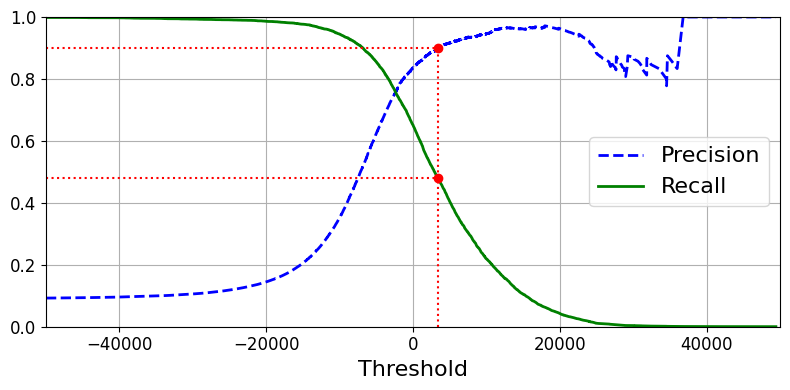

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [36]:
(y_train_pred == (y_scores > 0)).all()

np.True_

In [ ]:
# Plot precision vs recall curve

# Variables:
# - precisions: Precision values for different threshold settings
# - recalls: Recall values for different threshold settings
# - recall_90_precision: The recall value that corresponds to a precision of 0.9

# Function:
# - plot_precision_vs_recall: Plots the precision vs recall curve using the given data
# - save_fig: Saves the plot with the specified filename

# Instructions:
# 1. Plot the precision-recall curve by calling the function `plot_precision_vs_recall(precisions, recalls)`
# 2. Add vertical and horizontal lines to indicate the threshold corresponding to a precision of 0.9.
# 3. Mark the point of interest (where recall equals the value for 0.9 precision) with a red dot.
# 4. Save the plot as a figure using `save_fig("precision_vs_recall_plot")`.
# 5. Show the plot using `plt.show()`.

# The precision-recall plot helps visualize the trade-off between precision and recall at different thresholds.


Saving figure precision_vs_recall_plot


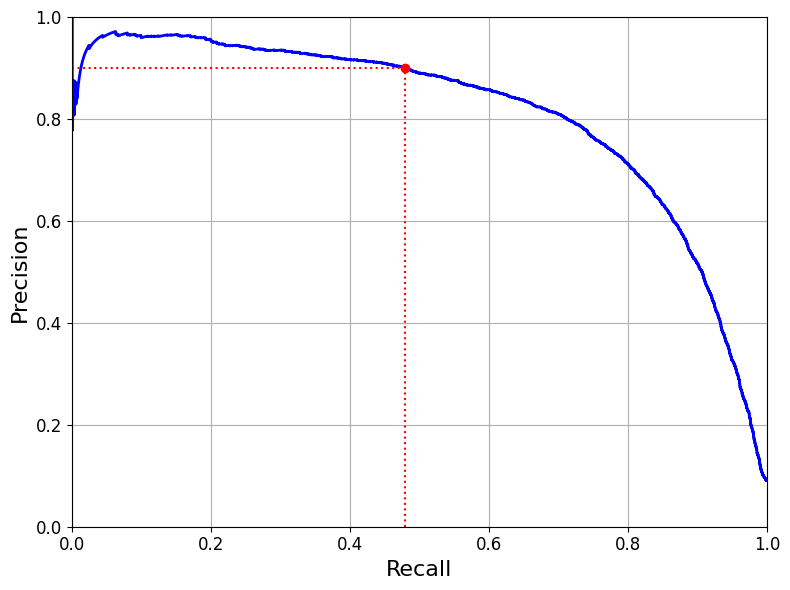

In [37]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [38]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [39]:
threshold_90_precision

np.float64(3370.0194991439557)

In [40]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [41]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [42]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

<a id="roc"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>3.5 |</span> The ROC Curve</b></p>
</div>


In [ ]:
# Compute ROC curve

# Variables:
# - y_train_5: True labels (1 if digit is 5, else 0)
# - y_scores: Scores predicted by the classifier (decision function)

# Function:
# - roc_curve: Computes false positive rate (fpr), true positive rate (tpr), and thresholds for different decision thresholds.

# Instructions:
# 1. Use the `roc_curve` function to compute the false positive rate (`fpr`), true positive rate (`tpr`), and decision thresholds (`thresholds`).
# 2. The function takes `y_train_5` (true labels) and `y_scores` (predicted scores) as inputs.
# 3. The `fpr` and `tpr` arrays will provide the false positive and true positive rates at each threshold.

# The ROC curve can be used to evaluate the performance of a classifier across different thresholds, showing the trade-off between TPR (sensitivity) and FPR (1 - specificity).


In [43]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
# Plot ROC Curve

# Variables:
# - fpr: False Positive Rate (from the roc_curve function)
# - tpr: True Positive Rate (from the roc_curve function)
# - recall_90_precision: Precision at the desired recall level (e.g., 0.9)

# Function:
# plot_roc_curve(fpr, tpr, label=None)

# Instructions:
# 1. Use the `plot_roc_curve` function to plot the ROC curve, passing the false positive rate (`fpr`) and true positive rate (`tpr`).
# 2. The ROC curve shows the trade-off between the False Positive Rate (FPR) and True Positive Rate (TPR).
# 3. A dashed diagonal line is plotted to represent random guessing (i.e., FPR = TPR).
# 4. The red dashed lines show the ROC curve at the point where the recall is equal to the desired `recall_90_precision`.
# 5. Use `fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]` to find the false positive rate at the desired recall.
# 6. Save the plot as `roc_curve_plot`.

# The ROC curve is a good tool to assess the classifier's performance across different thresholds, and the position of the point with the highest recall (90% in this case) can be emphasized.


Saving figure roc_curve_plot


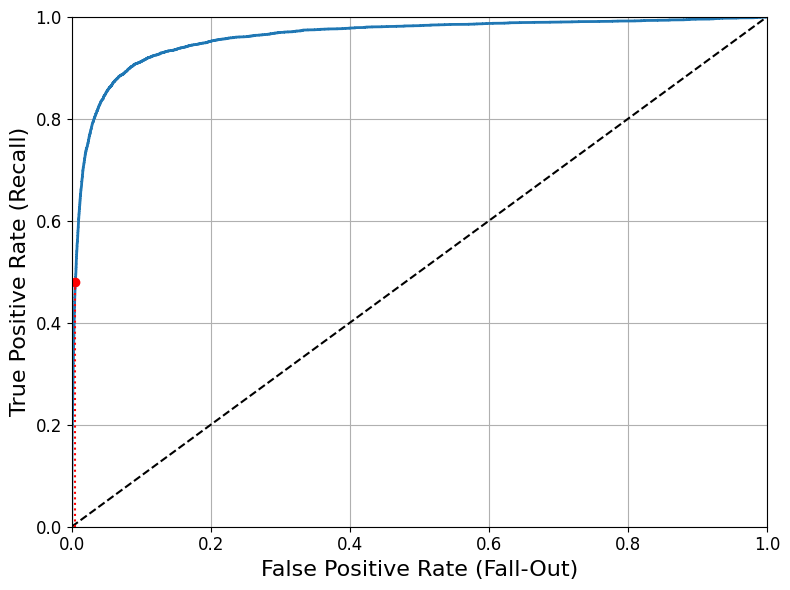

In [44]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [ ]:
# Calculate ROC AUC Score

# Variables:
# - y_train_5: true labels (1 if digit is 5, else 0)
# - y_scores: decision function values (from the classifier)

# Function:
# roc_auc_score(y_train_5, y_scores)

# Instructions:
# 1. Use the `roc_auc_score` function to compute the area under the ROC curve.
# 2. This metric helps in evaluating the overall performance of the classifier, where a higher AUC indicates better performance.
# 3. The ROC AUC score ranges from 0 to 1, where 1 represents perfect classification and 0.5 represents a random classifier.


In [45]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

**Note**: we set `n_estimators=100` to be future-proof since this will be the default value in Scikit-Learn 0.22.

In [ ]:
# Calculate predicted probabilities using Random Forest

# Variables:
# - X_train: feature matrix of training data
# - y_train_5: true labels (1 if digit is 5, else 0)
# - forest_clf: RandomForestClassifier object
# - n_estimators: number of trees in the forest (set to 100)
# - cv: number of cross-validation splits (set to 3)

# Function:
# cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

# Instructions:
# 1. Use `RandomForestClassifier` to create a classifier with 100 trees.
# 2. Use `cross_val_predict` to perform cross-validation and obtain the predicted probabilities (`predict_proba` method).
# 3. This method returns probabilities for each class (in this case, for class 5 and non-class 5), which is useful for evaluating performance metrics like ROC curves and AUC scores.


In [47]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [ ]:
# Calculate ROC curve for Random Forest classifier

# Variables:
# - y_probas_forest: predicted probabilities for class 5
# - y_train_5: true labels (1 if digit is 5, else 0)
# - fpr_forest: false positive rates for the ROC curve
# - tpr_forest: true positive rates for the ROC curve
# - thresholds_forest: thresholds used to calculate the true and false positive rates

# Function:
# roc_curve(y_train_5, y_scores_forest)

# Instructions:
# 1. Extract the probabilities of the positive class (class 5) from `y_probas_forest` by selecting the second column (`[:, 1]`).
# 2. Use `roc_curve` to calculate the false positive rates (fpr), true positive rates (tpr), and the corresponding thresholds for the ROC curve.
# 3. This will allow you to evaluate how well the Random Forest classifier distinguishes between class 5 and non-class 5.


In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [ ]:
# Plot ROC curve comparison between SGD and Random Forest classifiers

# Variables:
# - fpr: false positive rates for the ROC curve of SGD classifier
# - tpr: true positive rates for the ROC curve of SGD classifier
# - fpr_forest: false positive rates for the ROC curve of Random Forest classifier
# - tpr_forest: true positive rates for the ROC curve of Random Forest classifier
# - recall_90_precision: recall at precision 90%
# - recall_for_forest: recall for Random Forest classifier at the same false positive rate

# Function:
# plot_roc_curve(fpr, tpr, label) -> To plot the ROC curve for SGD and Random Forest classifiers

# Instructions:
# 1. Use `plot_roc_curve()` to plot the ROC curve for both SGD and Random Forest classifiers.
# 2. Plot the red dashed lines corresponding to the false positive rate at 90% precision (`fpr_90`) and the recall values.
# 3. Mark the intersection of these lines with "ro" (red circles) to highlight the recall at precision 90%.
# 4. Save the plot using `save_fig("roc_curve_comparison_plot")` for comparison.
# 5. Display the plot using `plt.show()` to visualize the comparison.


Saving figure roc_curve_comparison_plot


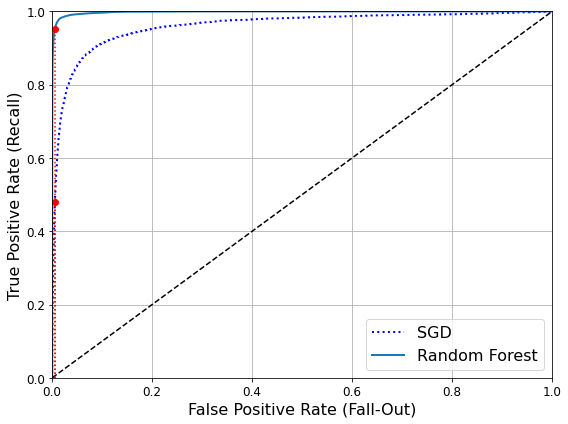

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

<a id="multilabel"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>4.1 |</span> Multilabel Classification</b></p>
</div>


In [ ]:
# Variables:
# - svm_clf: Support Vector Classifier instance (with gamma="auto" and random_state=42)
# - X_train: Training feature data
# - y_train: Training target labels
# - some_digit: A specific digit (or feature vector) to predict

# Instructions:
# 1. Instantiate a Support Vector Classifier (SVC) with the required hyperparameters (gamma="auto" and random_state=42).
# 2. Train the model using the training data (`X_train[:1000]` and `y_train[:1000]`).
# 3. Use the trained classifier to predict the label for a specific input (`some_digit`).


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
# Variables:
# - svm_clf: Trained Support Vector Classifier instance
# - some_digit: A specific digit (or feature vector) to evaluate
# - some_digit_scores: Decision function scores for the input `some_digit`

# Instructions:
# 1. Use the `decision_function` method of the trained SVC model (`svm_clf`) to compute the decision function scores for the input `some_digit`.
# 2. `some_digit_scores` will contain the decision scores that represent how confident the model is about the class prediction for `some_digit`.


In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [ ]:
# Variables:
# - some_digit_scores: Decision function scores for the input digit
# - np.argmax(some_digit_scores): Index of the highest decision function score

# Instructions:
# 1. Use `np.argmax()` on `some_digit_scores` to find the index of the class with the highest decision score.
# 2. This will give you the predicted class index based on the highest confidence score from the decision function.


In [ ]:
np.argmax(some_digit_scores)

5

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
svm_clf.classes_[5]

5

In [ ]:
# Variables:
# - X_train: Training features data
# - y_train: Training labels data (with multiple classes)
# - some_digit: The digit or input for which the prediction is to be made
# - ovr_clf: A OneVsRestClassifier using SVC as the base classifier
# - ovr_clf.fit(): Trains the OneVsRest classifier on the training data
# - ovr_clf.predict(): Predicts the class of the input `some_digit`

# Instructions:
# 1. Use the `OneVsRestClassifier` with SVC as the base classifier to handle multiclass classification.
# 2. Train the classifier using `ovr_clf.fit(X_train[:1000], y_train[:1000])` on the training data.
# 3. Use `ovr_clf.predict([some_digit])` to predict the class for the `some_digit` input.
# 4. The prediction will return the class label that the model predicts for the provided input.


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
# Variable:
# - ovr_clf.estimators_: The list of estimators (SVC classifiers) used by the OneVsRestClassifier.

# Instructions:
# 1. Use `len(ovr_clf.estimators_)` to determine how many classifiers were trained in the OneVsRest setup.
# 2. Since the OneVsRest strategy trains one classifier for each class, this should return the number of classes.


In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
# Variable:
# - sgd_clf: The classifier instance (Stochastic Gradient Descent classifier).
# - X_train: The training data (features).
# - y_train: The true labels corresponding to X_train.
# - some_digit: A sample data point (digit) for prediction.

# Instructions:
# 1. Train the SGD classifier (`sgd_clf`) using `X_train` (training features) and `y_train` (true labels).
# 2. Predict the label for `some_digit` using `sgd_clf.predict([some_digit])`.
# 3. This will return the predicted class for `some_digit` based on the model trained on `X_train` and `y_train`.


In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
# Variable:
# - sgd_clf: The classifier instance (Stochastic Gradient Descent classifier).
# - some_digit: A sample data point (digit) for which we want to calculate the decision function.

# Instructions:
# 1. Use the `decision_function` method on the trained `sgd_clf` to compute the decision score for `some_digit`.
# 2. The `decision_function([some_digit])` will return the raw decision values (distance from the decision boundary)
#    for the given input (`some_digit`).
# 3. These scores indicate how confidently the model classifies the sample and are used for further decision-making or thresholding.


In [ ]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

**Warning**: the following two cells may take close to 30 minutes to run, or more depending on your hardware.

In [ ]:
# Variable:
# - sgd_clf: The classifier instance (Stochastic Gradient Descent classifier).
# - X_train: The features of the training dataset.
# - y_train: The target labels for the training dataset.
# - cv: The number of folds for cross-validation (here, 3-fold).
# - scoring: The metric used to evaluate the model's performance (accuracy in this case).

# Instructions:
# 1. Use `cross_val_score` to perform k-fold cross-validation (with k=3) on the `sgd_clf`.
# 2. Specify the `scoring="accuracy"` argument to evaluate the model's accuracy.
# 3. The function will return an array of accuracy scores, one for each fold in the cross-validation process.


In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
# Variables:
# - scaler: An instance of StandardScaler used to standardize features.
# - X_train: The features of the training dataset.
# - X_train_scaled: The scaled version of the features using `StandardScaler`.
# - sgd_clf: The Stochastic Gradient Descent classifier.
# - y_train: The target labels for the training dataset.
# - cv: The number of folds for cross-validation (here, 3-fold).
# - scoring: The metric used to evaluate the model's performance (accuracy in this case).

# Instructions:
# 1. Create a `StandardScaler` instance.
# 2. Use the `fit_transform` method on `X_train` to standardize the features and store the result in `X_train_scaled`.
#    - This scales the features to have mean=0 and standard deviation=1.
# 3. Use `cross_val_score` to perform k-fold cross-validation (with k=3) on the `sgd_clf` using the scaled features (`X_train_scaled`).
# 4. The function will return an array of accuracy scores, one for each fold in the cross-validation process.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Error Analysis

In [ ]:
# Variables:
# - sgd_clf: The Stochastic Gradient Descent classifier.
# - X_train_scaled: The scaled training features.
# - y_train: The true target labels for the training dataset.
# - y_train_pred: The predicted labels obtained from cross-validation.
# - cv: The number of folds for cross-validation (here, 3-fold).
# - conf_mx: The confusion matrix, which compares the true labels (`y_train`) with the predicted labels (`y_train_pred`).

# Instructions:
# 1. Use `cross_val_predict` to perform 3-fold cross-validation with `sgd_clf` on the scaled features `X_train_scaled` and true labels `y_train`.
#    - This will return the predicted labels (`y_train_pred`) for each fold in the cross-validation process.
# 2. Use the `confusion_matrix` function to compare the true labels (`y_train`) with the predicted labels (`y_train_pred`).
# 3. Store the resulting confusion matrix in `conf_mx` and print it to see how well the model performed.


In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [ ]:
# Variables:
# - matrix: The confusion matrix to be visualized.

# Instructions:
# 1. Define the function `plot_confusion_matrix(matrix)` to visualize the given confusion matrix.
# 2. Inside the function, create a figure of size (8,8) to display the matrix.
# 3. Use `ax.matshow(matrix)` to display the confusion matrix as a color plot (heatmap).
# 4. Add a colorbar to the matrix plot using `fig.colorbar(cax)` for better interpretation of the values.
# 5. The function does not return anything but will display the plot when called.



In [ ]:
# since sklearn 0.22, you can use sklearn.metrics.plot_confusion_matrix()
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [ ]:
# Variables:
# - conf_mx: The confusion matrix to be visualized.
# - tight_layout=False: Optional argument for `save_fig()` to avoid tight layout adjustments.

# Instructions:
# 1. Use `plt.matshow()` to visualize the confusion matrix `conf_mx` with a grayscale color map (`cmap=plt.cm.gray`).
# 2. Save the plot using `save_fig("confusion_matrix_plot", tight_layout=False)` to store the image without layout adjustments.
# 3. Display the plot using `plt.show()`.




Saving figure confusion_matrix_plot


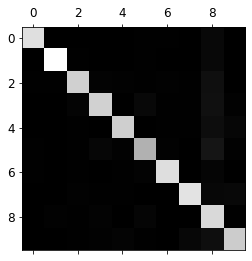

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [ ]:
# Variables:
# - conf_mx: The confusion matrix (with raw counts).
# - row_sums: The sum of each row in the confusion matrix (i.e., the total number of true samples for each class).
# - norm_conf_mx: The normalized confusion matrix (each row divided by its sum).

# Instructions:
# 1. Calculate `row_sums` by summing along the rows of `conf_mx`, keeping the number of dimensions (keepdims=True).
# 2. Normalize the confusion matrix `conf_mx` by dividing each element by the corresponding sum in `row_sums`.




In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
# Variables:
# - norm_conf_mx: The normalized confusion matrix (each row divided by its sum).
# - np.fill_diagonal: Function to fill the diagonal of a matrix with a specified value (in this case, 0).
# - The confusion matrix will be displayed with the diagonal set to 0, highlighting the errors.

# Instructions:
# 1. Use `np.fill_diagonal()` to set the diagonal elements of `norm_conf_mx` to 0. This will highlight the errors by removing correct predictions from the visualization.
# 2. Plot the modified `norm_conf_mx` using `plt.matshow()`, and use the `plt.cm.gray` colormap to view the matrix.
# 3. Save the plot using `save_fig()` with a specific filename for error visualization.
# 4. Display the plot using `plt.show()`.



Saving figure confusion_matrix_errors_plot


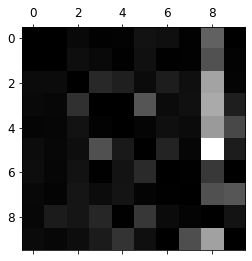

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [ ]:
# Variables:
# - cl_a: A class label, representing a specific digit (e.g., 3).
# - cl_b: Another class label, representing another digit (e.g., 5).
# - y_train_pred: Predicted labels for the training set.
# - X_train: The feature matrix for the training set, containing the data points.
# - plot_digits: A helper function used to display digit images in a grid (not defined here, but assumed to be a helper function for plotting).

# Instructions:
# 1. Define the two classes (cl_a and cl_b) for which you want to analyze misclassifications (for example, 3 and 5).
# 2. Create subsets of `X_train`:
#    - `X_aa`: Instances where the true label and predicted label are both `cl_a`.
#    - `X_ab`: Instances where the true label is `cl_a`, but the predicted label is `cl_b`.
#    - `X_ba`: Instances where the true label is `cl_b`, but the predicted label is `cl_a`.
#    - `X_bb`: Instances where the true label and predicted label are both `cl_b`.
# 3. Create a figure for visualization with 4 subplots (2x2 layout).
# 4. Use the `plot_digits()` function to display the first 25 digits from each of the subsets `X_aa`, `X_ab`, `X_ba`, and `X_bb`. The `images_per_row=5` argument ensures the images are displayed in 5 columns per row.
# 5. Save the plot using `save_fig()`.
# 6. Finally, display the plot with `plt.show()`.



Saving figure error_analysis_digits_plot


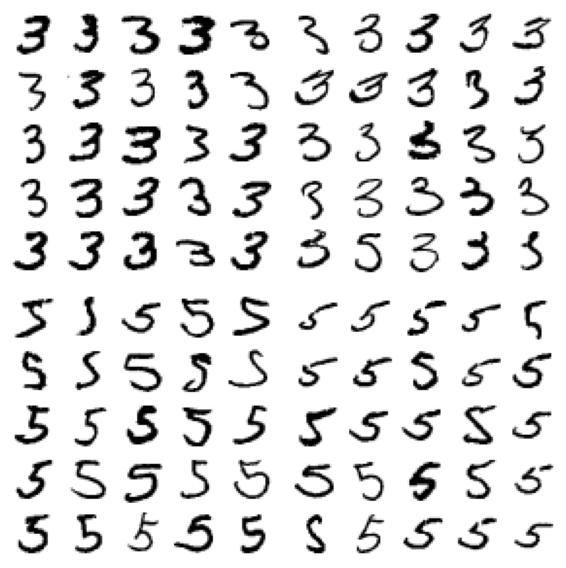

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

<a id="multilabel"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>4.2 |</span> Multilabel Classification</b></p>
</div>


In [ ]:
# Variables:
# - y_train: The true labels of the training set (digits 0 to 9).
# - y_train_large: A binary label where True indicates digits 7 or higher, and False indicates digits lower than 7.
# - y_train_odd: A binary label where True indicates odd digits, and False indicates even digits.
# - y_multilabel: A multilabel target array, which combines both binary labels (y_train_large and y_train_odd) for each instance.
# - knn_clf: The K-Nearest Neighbors (KNN) classifier used for multilabel classification.

# Instructions:
# 1. Define the new labels:
#    - `y_train_large`: Assign True for labels greater than or equal to 7, and False for labels less than 7.
#    - `y_train_odd`: Assign True for odd digits, and False for even digits.
#    - `y_multilabel`: Combine the two binary labels (`y_train_large` and `y_train_odd`) into a 2-column matrix using `np.c_[]`.
# 2. Create an instance of the KNN classifier (`knn_clf`).
# 3. Fit the KNN classifier on `X_train` and the new multilabel target `y_multilabel`.
#    - `X_train`: The feature matrix containing the images of digits.
#    - `y_multilabel`: The multilabel target matrix containing labels for both "large digits" and "odd digits".




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
# Variables:
# - knn_clf: The K-Nearest Neighbors classifier that has been trained with multilabel targets (large digits and odd digits).
# - some_digit: A single sample from the dataset, represented as an image or feature vector.

# Instructions:
# 1. Use the `predict` method of the trained `knn_clf` classifier to make a prediction for a new input (`some_digit`).
#    - This will output the predicted labels for both the "large digits" and "odd digits" for the input image.
#    - The result will be a 2-element array, where:
#      - The first element indicates whether the digit is large (>= 7) or not.
#      - The second element indicates whether the digit is odd or not.

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

**Warning**: the following cell may take a very long time (possibly hours depending on your hardware).

In [ ]:
# Variables:
# - knn_clf: The trained K-Nearest Neighbors classifier for multilabel classification (e.g., large digit prediction and odd digit prediction).
# - X_train: Training feature data, used to evaluate the model.
# - y_multilabel: The true multilabel targets for each sample, containing both large digit and odd digit labels.
# - y_train_knn_pred: The predictions made by the classifier using cross-validation, stored as a result of `cross_val_predict`.
# - f1_score: The function from `sklearn.metrics` used to calculate the F1 score for multilabel classification.

# Instructions:
# 1. First, use `cross_val_predict` with the KNN classifier to generate predictions (`y_train_knn_pred`) on the training data (`X_train`).
#    - The cross-validation process will provide predictions for each label (e.g., large and odd digit classification) across multiple folds.
# 2. Then, calculate the F1 score using `f1_score` with the `average="macro"` parameter to compute the average F1 score across all labels.
#    - This helps evaluate how well the classifier is performing for both "large digits" and "odd digits" classification tasks.

# Example:
# f1_score(y_multilabel, y_train_knn_pred, average="macro")
# This will return the average F1 score over the two labels for each instance (large digit and odd digit).


In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

<a id="multioutput"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>4.3 |</span> Multioutput Classification</b></p>
</div>


In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


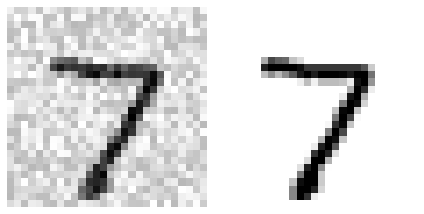

In [ ]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Saving figure cleaned_digit_example_plot


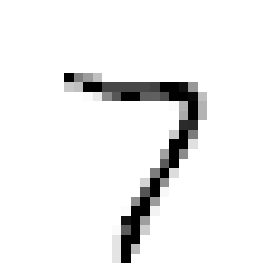

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

# Extra material

## Dummy (ie. random) classifier

In [ ]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier(strategy="prior")
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

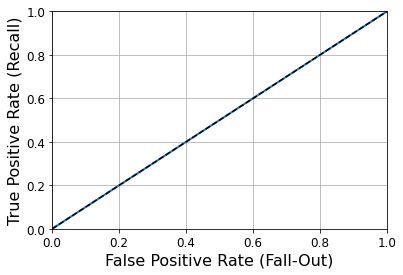

In [ ]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

## KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
y_knn_pred = knn_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

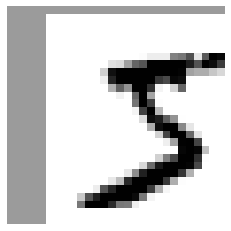

In [ ]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [ ]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [ ]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [ ]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

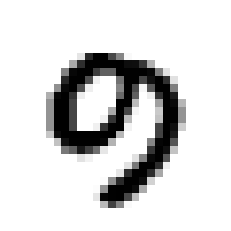

In [ ]:
plot_digit(ambiguous_digit)

<a id="multioutput"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>5 |</span> Conclusion</b></p>
</div>
